In [119]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install geopy

In [3]:
# !pip install folium

In [4]:
df = pd.read_csv('lady_footlocker_locations_feb_2021.csv')
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   address_line_1  59 non-null     object
 1   address_line_2  37 non-null     object
 2   city            59 non-null     object
 3   name            59 non-null     object
 4   phone           59 non-null     object
 5   state           57 non-null     object
 6   url             59 non-null     object
 7   zip_code        59 non-null     int64 
 8   address         59 non-null     object
 9   Updated_Date    59 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.7+ KB


In [6]:
df.shape

(59, 10)

In [54]:
df['zip_code'] = df['zip_code'].astype(str)

In [55]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [80]:
geolocator = Nominatim(user_agent='my geocoder')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1, max_retries=0)
df['point'] = df['address'].apply(geocode)

In [81]:
df['point'] = df['point'].apply(lambda x: (x.latitude, x.longitude) if x else np.nan)

In [82]:
df['point'].fillna((df['zip_code'] + ' ' + df['city']).apply(geocode).apply(lambda x: (x.latitude, x.longitude)), inplace = True)

In [83]:
df['point']

0                   (32.2228765, -110.9748477)
1                    (39.729432, -104.8319196)
2                    (21.304547, -157.8556764)
3                    (41.6010821, -87.5581579)
4     (30.387688478432157, -91.08695006192693)
5                     (42.2097963, -71.001075)
6                    (42.4333367, -82.9238847)
7             (38.63510455, -90.3476632779996)
8                   (39.5261206, -119.8126581)
9                    (35.7803977, -78.6390989)
10    (41.703535373637344, -83.64646516990508)
11     (40.62977289196522, -75.48274180315565)
12    (34.849582549999994, -82.33315889539456)
13             (38.9317403, -77.1670637790478)
14                  (33.9852331, -118.3944704)
15    (36.808457913043476, -119.7794255652174)
16          (34.14468215, -118.25889419596774)
17                  (37.6390972, -120.9968782)
18                  (38.5810606, -121.4938951)
19                  (37.7790262, -122.4199061)
20                   (34.413819, -118.5610378)
21    (34.069

In [84]:
df[['latitude', 'longitude']] = pd.DataFrame(df['point'].to_list(), index=df.index)

In [85]:
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,location,point,latitude,longitude
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,85705Tucson,"(32.2228765, -110.9748477)",32.222876,-110.974848
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,80012Aurora,"(39.729432, -104.8319196)",39.729432,-104.831920
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,96814Honolulu,"(21.304547, -157.8556764)",21.304547,-157.855676
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(41.6010821, -87.5581579)","(41.6010821, -87.5581579)",41.601082,-87.558158
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,70836Baton Rouge,"(30.387688478432157, -91.08695006192693)",30.387688,-91.086950


In [125]:
import folium
from folium.plugins import MarkerCluster

In [126]:
m = folium.Map(location = df[['latitude', 'longitude']].mean().to_list(), zoom_start=3)

for i, row in df.iterrows():
    location = (row['latitude'], row['longitude'])
    folium.Marker(location = location, popup = row['state']).add_to(m)

m

In [98]:
# import io
# from PIL import Image

# img_data = m._to_png(5)
# img = Image.open(io.BytesIO(img_data))
# img.save('geolocations.png')

WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


In [113]:
top5 = df.groupby('state')['name'].count().sort_values(ascending = False).nlargest(5)

In [114]:
top5

state
TX    9
CA    8
NJ    6
GA    5
NY    4
Name: name, dtype: int64

<AxesSubplot:title={'center':'Top 5 states'}, xlabel='Number of Foot Locker Stores', ylabel='state'>

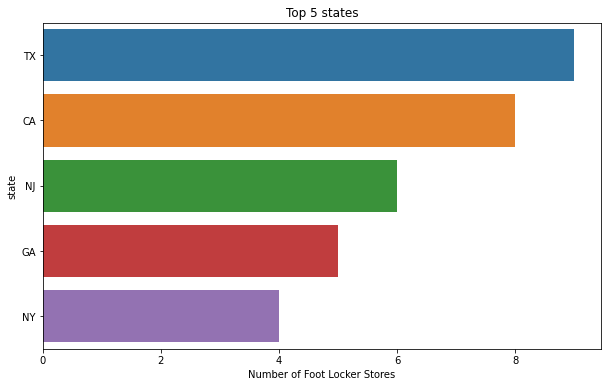

In [124]:
fig = plt.figure(figsize = (10, 6))
plt.title('Top 5 states')
plt.xlabel('Number of Foot Locker Stores')
sns.barplot(x = top5.values, y = top5.index, orient='h')